In [13]:
import pandas as pd
import os
MXCHIP_PATH = 'd:\\onedrive - microsoft\\ml\\mxchip'

def load_mxchip_data(MXCHIP_PATH):
    csv_path = os.path.join(MXCHIP_PATH, "mxchip.csv")
    return pd.read_csv(csv_path)

In [14]:
mxchip = load_mxchip_data(MXCHIP_PATH)

In [15]:
mxchip.head()

,humidity,temp,pressure,magnetometerX,magnetometerY,magnetometerZ,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,EventProcessedUtcTime,PartitionId,EventEnqueuedUtcTime,IoTHub
0,69.8,11.1,1026.09,-105,267,90,-550,-535,704,-770,-3010,140,2018-01-04T02:51:31.9118042Z,0,2018-01-04T02:49:30.5200000Z,Record
1,69.7,11.1,1026.08,-111,266,85,-550,-535,705,-770,-3080,140,2018-01-04T02:51:32.1732819Z,0,2018-01-04T02:49:35.6340000Z,Record
2,70.0,11.1,1026.08,-104,269,84,-550,-535,704,-770,-2870,210,2018-01-04T02:51:32.1732819Z,0,2018-01-04T02:49:41.7520000Z,Record
3,69.8,11.1,1026.06,-108,273,84,-550,-534,706,-700,-2940,140,2018-01-04T02:51:32.1732819Z,0,2018-01-04T02:49:47.8540000Z,Record
4,69.9,11.3,1026.06,-107,270,84,-550,-535,706,-700,-3010,140,2018-01-04T02:51:32.1732819Z,0,2018-01-04T02:49:52.9700000Z,Record


In [16]:
from numpy import genfromtxt
mxchip_array = genfromtxt('d:\\onedrive - microsoft\\ml\\mxchip\\mxchip.csv', delimiter=',')

In [17]:
mxchip.describe()

,humidity,temp,pressure,magnetometerX,magnetometerY,magnetometerZ,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,PartitionId
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.0
mean,69.775647,10.960050,1023.019771,-106.914958,270.076303,84.173782,-538.055630,-541.191597,707.180504,-728.435294,-2983.094118,147.588235,0.0
std,2.457343,0.513557,1.203978,6.245321,4.295235,4.131522,47.776706,24.485781,9.252043,60.794223,87.267341,36.223868,0.0
min,67.100000,10.200000,1021.750000,-116.000000,261.000000,61.000000,-550.000000,-671.000000,703.000000,-2240.000000,-5530.000000,-420.000000,0.0
25%,68.000000,10.700000,1022.190000,-110.000000,268.000000,83.000000,-549.000000,-536.000000,704.000000,-770.000000,-3010.000000,140.000000,0.0
50%,68.800000,10.900000,1022.450000,-108.000000,270.000000,85.000000,-549.000000,-536.000000,705.000000,-700.000000,-3010.000000,140.000000,0.0
75%,70.600000,11.100000,1023.387500,-106.000000,271.000000,86.000000,-548.000000,-535.000000,706.000000,-700.000000,-2940.000000,140.000000,0.0
max,75.700000,13.600000,1026.200000,-49.000000,306.000000,94.000000,-283.000000,-534.000000,755.000000,-490.000000,-2730.000000,280.000000,0.0


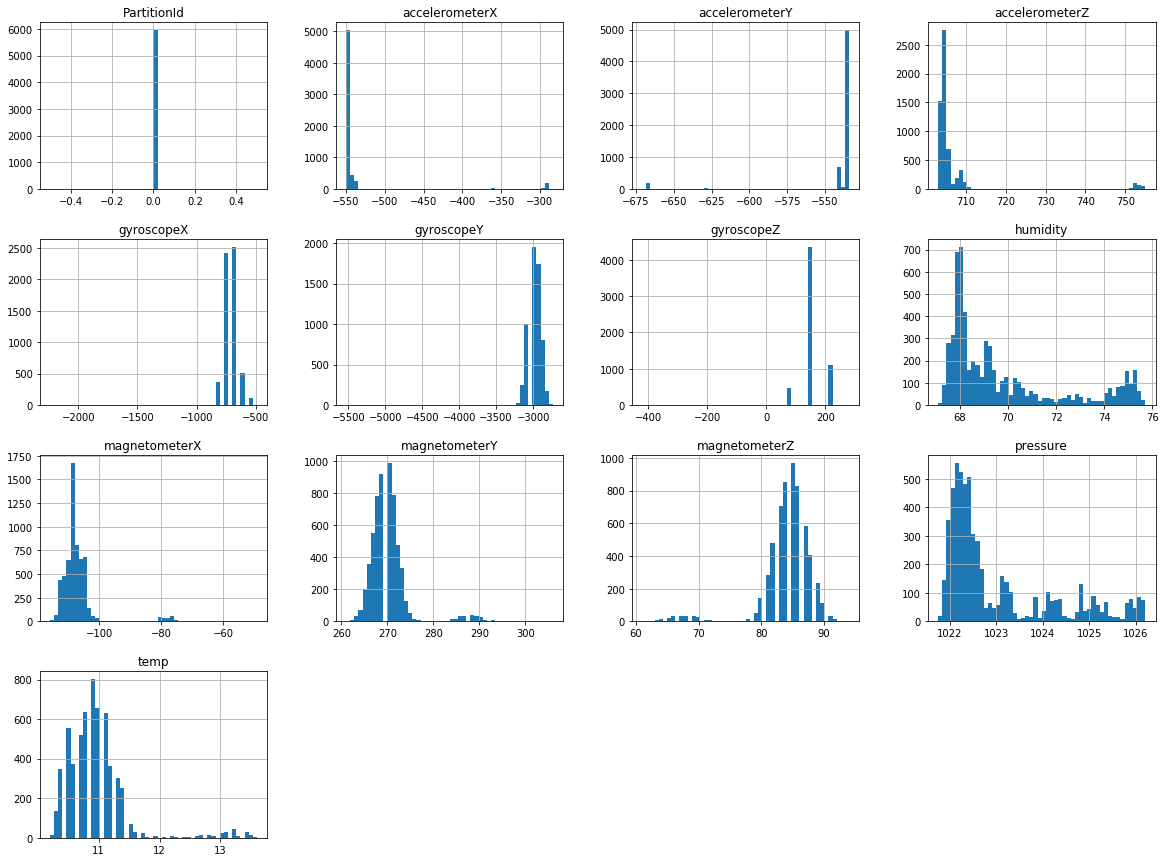

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
mxchip.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
import tensorflow as tf
tf.reset_default_graph()


n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [35]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [36]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [40]:
n_iterations = 5000
batch_size = 20  

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch = mxchip_tmp[iteration:(iteration+20),]
        y_batch = mxchip_tmp[(iteration+1):(iteration+21),]
        X_batch = X_batch.reshape(1,20,1)
        y_batch = X_batch.reshape(1,20,1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    save_path = saver.save(sess, "./temp_model.ckpt")

0 	MSE: 112.90325
100 	MSE: 35.073673
200 	MSE: 29.487154
300 	MSE: 27.540676
400 	MSE: 26.40036
500 	MSE: 25.677948
600 	MSE: 23.884918
700 	MSE: 23.01943
800 	MSE: 22.113028
900 	MSE: 21.32587
1000 	MSE: 21.70932
1100 	MSE: 20.914919
1200 	MSE: 20.73536
1300 	MSE: 22.572054
1400 	MSE: 21.545153
1500 	MSE: 21.454437
1600 	MSE: 20.534575
1700 	MSE: 20.560469
1800 	MSE: 21.02863
1900 	MSE: 20.881535
2000 	MSE: 20.247309
2100 	MSE: 19.873129
2200 	MSE: 20.31319
2300 	MSE: 19.916512
2400 	MSE: 18.598639
2500 	MSE: 18.86541
2600 	MSE: 18.565172
2700 	MSE: 18.125004
2800 	MSE: 17.867132
2900 	MSE: 17.8814
3000 	MSE: 17.655422
3100 	MSE: 17.542
3200 	MSE: 17.403938
3300 	MSE: 17.549423
3400 	MSE: 17.047611
3500 	MSE: 17.16931
3600 	MSE: 16.821188
3700 	MSE: 16.944475
3800 	MSE: 16.369583
3900 	MSE: 16.503069
4000 	MSE: 16.248634
4100 	MSE: 16.585451
4200 	MSE: 16.539837
4300 	MSE: 16.534954
4400 	MSE: 16.436218
4500 	MSE: 16.478273
4600 	MSE: 16.303734
4700 	MSE: 18.31855
4800 	MSE: 18.34893

In [18]:
mxchip_array

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [  69.8 ,   11.1 , 1026.09, ...,    0.  ,     nan,     nan],
       [  69.7 ,   11.1 , 1026.08, ...,    0.  ,     nan,     nan],
       ...,
       [  72.9 ,   13.3 , 1022.19, ...,    0.  ,     nan,     nan],
       [  72.6 ,   13.4 , 1022.15, ...,    0.  ,     nan,     nan],
       [  72.8 ,   13.3 , 1022.17, ...,    0.  ,     nan,     nan]])

In [19]:
mxchip_tmp = mxchip_array[:,1]

In [20]:
mxchip_tmp

array([ nan, 11.1, 11.1, ..., 13.3, 13.4, 13.3])

In [21]:
import numpy
mxchip_tmp = numpy.delete(mxchip_tmp,(0),axis=0)

In [88]:
mxchip_tmp = mxchip_tmp[0:9,]

In [22]:
mxchip_tmp

array([11.1, 11.1, 11.1, ..., 13.3, 13.4, 13.3])

In [42]:
with tf.Session() as sess:
    saver.restore(sess, "./temp_model.ckpt")
    X_new = [11.1, 11.1, 11.1,11.1,11.3,11.2,11.2,11.3,11.2,11.3,11.2,11.2,11.3,11.4,11.3,11.4,11.3,11.3,11.3,11.4]
    X_new = X_batch.reshape(1,20,1)
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./temp_model.ckpt


In [50]:
X_new = [11.1, 11.1, 11.1,11.1,11.3,11.2,11.2,11.3,11.2,11.3,11.2,11.2,11.3,11.4,11.3,11.4,11.3,11.3,11.3,11.4]
X_new = X_batch.reshape(1,20,1)
print(X_new)
print(y_pred)

[[[11. ]
  [11. ]
  [11.1]
  [11. ]
  [11. ]
  [10.9]
  [10.9]
  [11. ]
  [11. ]
  [10.9]
  [10.9]
  [11. ]
  [11. ]
  [11. ]
  [11. ]
  [11. ]
  [11. ]
  [11.1]
  [11.1]
  [11.1]]]
[[[ 0.         0.         7.0817375 ...  0.         0.         0.       ]
  [ 0.         0.        11.081022  ... 11.073389   0.        11.066631 ]
  [ 0.         0.        11.0690565 ... 11.021012   0.        11.009116 ]
  ...
  [ 0.         0.        11.050434  ... 11.00449    0.        11.010362 ]
  [ 0.         0.        11.086128  ... 11.099735   0.        11.112113 ]
  [ 0.         0.        11.085093  ... 11.1014805  0.        11.111249 ]]]
